# Supervized Machine Learning

## Classification

### I use Iris flower data set for multi-class classification. The data set consists of 50 samples from each of three species of iris. Four features were measured from each sample, Total 3: the length and the width of the sepals and petals in cm.

### This Machine Learning will predict what kind of species when new four features are given.

In [1]:
import pandas as pd
import numpy as np
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
df = pd.read_csv(url, names=names)

Populating the interactive namespace from numpy and matplotlib


In [2]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = df.iloc[:,:-1].values
y = df.iloc[:,4].values

### Split the data into training and test dataset to figure out how accuracy this machine learning is.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0, stratify=y)

### Feature Scaling
### It is always a good practice to scale the features so that all of them can be uniformly evaluated.

In [8]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X_train)
X_train_std = scale.transform(X_train)
X_test_std = scale.transform(X_test)

### KNeighborsClassifier

### k-Fold Cross-Validation
### Cross-validation is when the dataset is randomly split up into 'k' groups. One of groups is used as the test set and the rest are used as the training set. The model is trained on the training set and scored on the test set. This process is repeated until each K group used as the test set.
### Main reasion to do k-fold Corss-validation is to prevent overfitting or underfitting.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn_cv,X,y, cv=5)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.96666667 1.         0.93333333 0.96666667 1.        ]
cv_scores mean:0.9733333333333334


### Figure out which K value yields the best results.

In [11]:
from sklearn.model_selection import GridSearchCV
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,40)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X_train,y_train)
knn_gscv.best_params_

{'n_neighbors': 11}

In [12]:
knn_gscv.best_score_

0.9666666666666667

### Best results comes from 11, n_neighbors and 96% accuracy

In [13]:
y_pred = knn_gscv.predict(X_test)

In [14]:
knn_gscv.score(X_test, y_test)

1.0

### Evaluating the algorithm for Knn

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


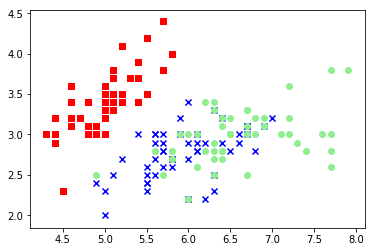

In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

markers = ('s', 'x', 'o');
colors = ('red', 'blue', 'lightgreen');
cmap = ListedColormap(colors[:len(np.unique(y_test))]);
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl);

## SVC

In [38]:
from sklearn.svm import SVC
svm_cv = SVC()
cv_scores = cross_val_score(svm_cv,X,y,cv=5)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)));

[0.96666667 1.         0.96666667 0.96666667 1.        ]
cv_scores mean:0.9800000000000001


C:\Users\Gabriel\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Gabriel\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Gabriel\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Gabriel\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: Fut

In [39]:
svm = SVC()
parameters = {'kernel':('linear','rbf'), 'C':(1,0.25,0.5,0.75),'gamma':(1,2,3,'auto'),'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}
clf = GridSearchCV(svm,parameters,cv=5)
clf.fit(X_train_std,y_train)
print(clf.best_params_)
print(clf.best_score_)
print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(clf.score(X_train_std, y_train)))
print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(clf.score(X_test_std, y_test)))

{'C': 1, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'linear', 'shrinking': True}
0.9666666666666667
The accuracy of the svm classifier on training data is 0.97 out of 1
The accuracy of the svm classifier on test data is 1.00 out of 1


### XGBoost Classifier

In [42]:
import xgboost as xgb
xgb_cv = xgb.XGBClassifier()
cv_scores = cross_val_score(xgb_cv,X,y,cv=5)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.96666667 0.96666667 0.93333333 0.9        1.        ]
cv_scores mean:0.9533333333333334


In [43]:
xgb_clf = xgb.XGBClassifier()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}
xgb_clf = GridSearchCV(xgb_clf, parameters, cv=5)
xgb_clf.fit(X_train_std, y_train)
print(xgb_clf.best_params_)
print(xgb_clf.best_score_)
print('The accuracy of the xgb classifier is {:.2f} out of 1 on training data'.format(xgb_clf.score(X_train_std, y_train)))
print('The accuracy of the xgb classifier is {:.2f} out of 1 on test data'.format(xgb_clf.score(X_test_std, y_test)))

{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 5, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}
0.9583333333333334
The accuracy of the xgb classifier is 0.97 out of 1 on training data
The accuracy of the xgb classifier is 0.97 out of 1 on test data
